<a href="https://colab.research.google.com/github/Lagc93/Senales_Y_Sistemas/blob/main/Parcial2_SyS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PARCIAL #2 - SEÑALES Y SISTEMAS**

**ESTUDIANTE:**
LUIS GUERRERO CAICEDO

**PUNTO #1**

Encuentre la expresion del espectro de Fourier (forma
exponencial y trigonometrica) para la señal $x(t)=|6\sin(3t+\pi/4)|^2$, con $t\in [-\pi, \pi]$. Presente las simulaciones
respectivas para graficar el espectro y la reconstruccion
de la señal en funcion del numero de armonicos y el error
relativo. Ver Cuaderno guıa serie de Fourier



## Solución:

Se tiene que:

$$x(t)=\left|6\sin\left(3t+\frac{\pi}{4}\right)\right|^2 = 6^2\sin^2\left(3t+\frac{\pi}{4}\right) = 36\left(\frac{1}{2}-\frac{\cos\left(6t+\frac{\pi}{2}\right)}{2}\right) = \frac{36}{2}-\frac{36\cos\left(6t+\frac{\pi}{2}\right)}{2} = 18 - 18\cos\left(6t+\frac{\pi}{2}\right)$$

Recordemos que:

$\cos(\theta+\frac{\pi}{2}) = \cos(\theta)\cos(\frac{\pi}{2})-\sin(\theta)\sin(\frac{\pi}{2}) = -\sin(\theta)$

Entonces:

$$\boxed{x(t) = 18+18\sin(6t)}$$

Ahora, por serie trigonométrica:

$$x(t) = a_0 + \sum_{n=1}^N{a_n\cos(n\omega_0 t) + b_n\sin(n\omega_0 t)},$$

donde:

$$a_0 = c_0 = \frac{1}{t_f-t_i}\int_{t_i}^{t_f}x(t)dt$$

y

$$a_n = \frac{2}{t_f-t_i}\int_{t_i}^{t_f}x(t)\cos(n\omega_0 t)dt$$

$$b_n = \frac{2}{t_f-t_i}\int_{t_i}^{t_f}x(t)\sin(n\omega_0 t)dt$$

Dado que $x(t)$ presenta simetría impar, $x(t)=-x(-t)$:


 $$\boxed{a_n = 0 \quad \forall n \in \{1,\dots,N\}}$$

Así:

$$x(t)=\left|6\sin\left(3t+\frac{\pi}{4}\right)\right|^2 = 18+18\sin(6t) = a_0 + \sum_{n=1}^N{b_n\sin(n\omega_0 t)}$$

$a_0$ codifica el nivel DC de la señal, entonces:

$$a_0 = \frac{1}{\pi-(-\pi)}\int_{-\pi}^{\pi}\left(18+18\sin(6t)\right)dt = \frac{18}{2\pi}\int_{-\pi}^{\pi}dt+\frac{18}{2\pi}\int_{-\pi}^{\pi}\sin(6t)dt$$

$$a_0 = \frac{18}{2\pi} t \Big|_{-\pi}^{\pi} - \frac{18}{12\pi}\cos(6t)\Big|_{-\pi}^\pi = \frac{18(\pi-(-\pi))}{2\pi}-\frac{18}{12\pi}\left(\cos(6\pi)-\cos(-6\pi)\right) = \frac{18 \cdot 2\pi}{2\pi} - 0 = 18$$

$$\boxed{a_0 = 18}$$

Por otra parte,

$$b_n = \frac{2}{\pi-(-\pi)}\int_{-\pi}^{\pi}x(t)\sin(n\omega_0 t)dt = \frac{2}{2\pi}\int_{-\pi}^{\pi}\left( 18+18\sin(6t)\right)\sin(n\omega_0 t)dt$$

$$b_n = \frac{18}{\pi}\int_{-\pi}^{\pi}{\sin(n\omega_0 t)dt} + \frac{18}{\pi}\int_{-\pi}^{\pi}{\sin(6t)\sin(n\omega_0 t)dt}$$

Teniendo en cuenta que:


$$\sin(\theta)\sin(\alpha)=\frac{\cos(\theta-\alpha)-\cos(\theta+\alpha)}{2}$$

Entonces:

$$b_n = \frac{18}{\pi}\int_{-\pi}^{\pi}{\sin(n\omega_0 t)dt} + \frac{9}{\pi}\int_{-\pi}^{\pi}{\cos([6-n\omega_0] t)dt} - \frac{9}{\pi}\int_{-\pi}^{\pi}{\cos([6+n\omega_0] t)dt}$$

En este caso: $\boxed{\omega_0 = 2\pi/2\pi = 1 [rad/s]}$

$$b_n = -\frac{18}{\pi n }\cos(nt)\Big|_{-\pi}^{\pi} + \frac{9}{\pi(6-n)}\sin([6-n]t)\Big|_{-\pi}^{\pi} - \frac{9}{\pi(6+n)}\sin([6+n]t)\Big|_{-\pi}^{\pi}$$

$$b_n = -\frac{18}{\pi n }\left(\cos(n\pi)-\cos(-n\pi)\right) + 9\frac{\sin([6-n]\pi)-\sin(-[6-n]\pi)}{\pi(6-n)}-9\frac{\sin([6+n]\pi)-\sin(-[6+n]\pi)}{\pi(6+n)}$$

Recordemos que $\cos(\theta)=\cos(-\theta)$ y $\sin(\theta)=-\sin(-\theta)$, entonces:

$$b_n = -\frac{18}{\pi n }\left(\cos(n\pi)-\cos(n\pi)\right) + 9\frac{\sin([6-n]\pi)+\sin([6-n]\pi)}{\pi(6-n)}-9\frac{\sin([6+n]\pi)+\sin([6+n]\pi)}{\pi(6+n)}$$

$$b_n = 18\frac{\sin([6-n]\pi)}{\pi(6-n)}-18\frac{\sin([6+n]\pi)}{\pi(6+n)}$$


Para $n\neq 6,$ $b_n = 0.$ No obstante, para $n = 6$ debemos calcular el límite y aproximar la indeterminación $\frac{0}{0}$:


$$b_6 = 18\lim_{n\to 6}\frac{\tfrac{d}{dn}\left[\sin([6-n]\pi)\right]}{\tfrac{d}{dn}\left[\pi(6-n)\right]} = 18\lim_{n\to 6}\frac{\cos([6-n]\pi)(-\pi)}{-\pi}$$

$$b_6 = 18\cos(0)= 18$$

$$\boxed{b_6 = 18}$$


$$b_{-6 }= -18\lim_{n\to {-6}}\frac{\tfrac{d}{dn}\left[\sin([6+n]\pi)\right]}{\tfrac{d}{dn}\left[\pi(6+n)\right]} = -18\lim_{n\to -6}\frac{\cos([6+n]\pi)(\pi)}{\pi}$$

$$b_{-6} = -18\cos(0)= -18$$

$$\boxed{b_{-6} = -18}$$

Por consiguiente:

$$\boxed{b_n = \left\{\begin{align} 0 & \quad \forall n \setminus \{-6,6\}\\
18 & \quad n = 6\\
-18 & \quad n = -6\\
\end{align}\right.}$$

$$\boxed{x(t) = a_0+\sum_{n=1}^{N}{b_n \sin(nt)} = a_0+b_6\sin(6t)=18+18\sin(6t)}$$

Para el caso de la serie exponencial compleja:

$$c_0 = a_0 = 18$$

y

$$c_n = \frac{a_n - j b_n}{2}$$

Entonces:

$$\boxed{c_n = \left\{\begin{align}
9j & \quad n = -6\\
18 & \quad n = 0\\
-9j & \quad n = 6\\
0 & \quad \forall n \setminus \{-6,0,6\}
\end{align}\right.}$$

y

$$\boxed{x(t) = \sum_{n=-N}^{N}{c_n e^{j n t}}}$$


$$x(t) = c_{-6}e^{-j6t} + c_{0}e^{0} + c_{6}e^{j6t}$$

$$x(t)= 9j(\cos(6t)-j\sin(6t))+18-9j(\cos(6t)+j\sin(6t)) $$

$$\boxed{x(t) = 9j\cos(6t)+9\sin(6t))+18-9j\cos(6t)+9\sin(6t)=18+18\sin(6t)}$$

ncontramos la potencia de la señal para calcular el error relativo:


$$e_r[\%] = \frac{\bar{P}_e}{\bar{P_x}} 100[\%] = \left(1-\frac{\sum^N_{n=-N}|c_n|^2P_n}{\bar{P}_x}\right)100[\%]$$

En este caso, la potencia de $x(t)$ se cálcula como:

\begin{equation}
P_x = \frac{1}{2\pi}\int\limits_{-\pi}^{\pi}{|x(t)^2|dt} = \frac{1}{2\pi}\int\limits_{-\pi}^{\pi}{|18+18\sin(6t)|^2dt} = \frac{1}{2\pi}\left(18^2\int\limits_{-\pi}^{\pi}dt + 2 \cdot 18^2 \int\limits_{-\pi}^{\pi}\sin(6t)dt + 18^2\int\limits_{-\pi}^{\pi}\sin^2(6t)dt\right)
\end{equation}


$$ P_x = \frac{1}{2\pi}\left(18^2(2\pi) + 2\cdot18^2(-\cos(6\pi)+\cos(-6\pi))+\frac{18^2}{2}\left(\int\limits_{-\pi}^{\pi}dt - \int\limits_{-\pi}^{\pi}\cos(12t)dt\right)\right)$$

$$P_x = \frac{1}{2\pi}\left(18^2(2\pi) +\frac{18^2(2\pi)}{2}-\frac{18^2}{2}(\sin(24\pi)-\sin(-24\pi))\right)$$

$$\boxed{P_x = 18^2 \left(\frac{3\pi}{2\pi}\right) = \frac{3}{2}18^2}$$

para el caso de la serie exponencial de Fourier $P_n=1$, por consiguiente:

\begin{equation}
E_r[\%] = 1 - \left(\frac{1}{P_x}\sum\limits_{n=-N}^N{|c_n|^2}\right).
\end{equation}

wo= 1.0
Fo= 1.5707963267948966


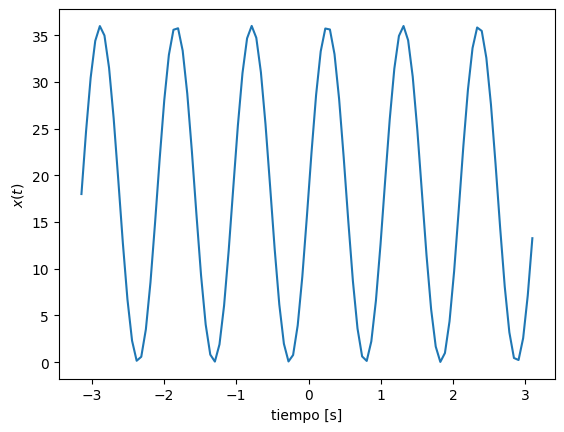

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact,IntSlider

ti = -np.pi #tiempo inicial
tf = np.pi #tiempo final
wo = 2*np.pi/(tf-ti) #frecuencia angular
Fo = wo/2*np.pi #frecuencia fundamental
print('wo=',wo)
print('Fo=',Fo)
Fs = 10*Fo #frecuencia muestreo -> debe respetar Nyquist Fs >= 2 Fo
tv = np.arange(ti,tf,1/Fs) #vector de tiempo

x = abs(6*np.sin(3*tv+(np.pi/4)))**2 #señal de entrada
plt.plot(tv,x) #gráfica de la señal
plt.xlabel('tiempo [s]')
plt.ylabel('$x(t)$')
plt.show()

In [ ]:
#se crean las bases de la serie exponencial compleja de Fourier
T = tf - ti #intervalo de interés
N = 20 #número armonicos a simular
wo = 2*np.pi/T # frecuencia fundamental
# definir bases
phin = np.zeros((len(tv),2*N+1),dtype=np.complex_)#crear matriz para guardar bases
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)#base de fourier en el intervalo de interés

# graficar bases
def pltbase(n=1):
    plt.plot(tv,np.real(phin[:,int(n+N)]),label="Re{$\phi_n$(t)}")
    plt.xlabel("t[s]",fontsize = 14)
    plt.ylabel("$\phi_n$(t)",fontsize = 14)
    plt.plot(tv,np.imag(phin[:,int(n+N)]),label="Im{$\phi_n$(t)}")
    plt.grid()
    plt.legend()
    plt.show()
    return
interact(pltbase,n=(-N,N,1))

plt.show()

interactive(children=(IntSlider(value=1, description='n', max=20, min=-20), Output()), _dom_classes=('widget-i…

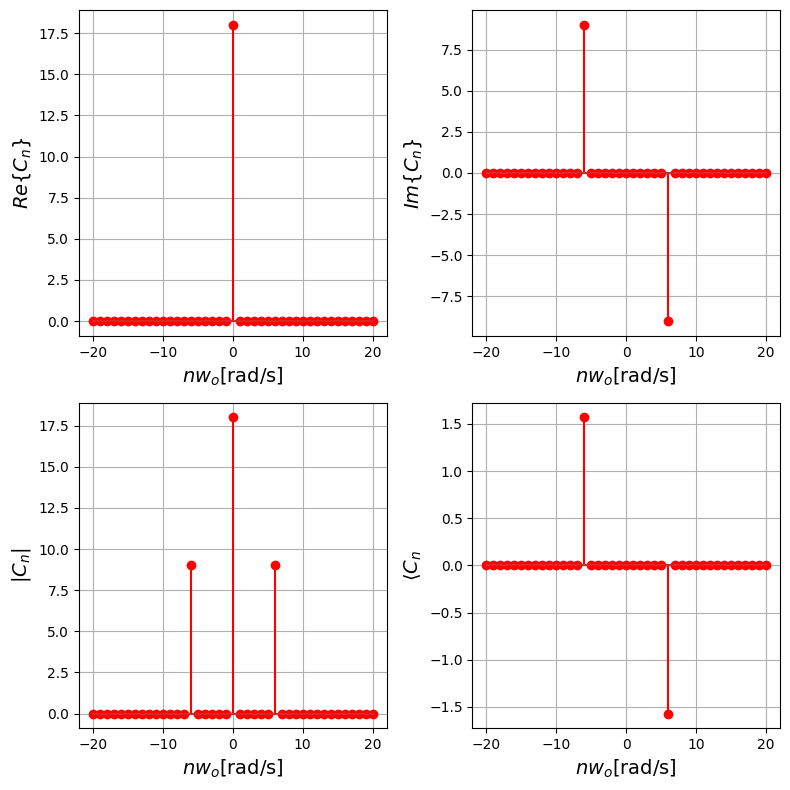

In [ ]:
#calcular espectro -> cambiar según la señal estudiada
cn = np.zeros(2*N+1,dtype=np.complex_)
nv = np.linspace(-N, N, 2*N+1) #vector armónicos
cn[N] = 18 # nivel dc C_0
cn[N-6] = 9j #armónico -6
cn[N+6] = -9j #armónico +6

#graficar espectro
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(cn), 'r') #Grafica la parte real del espectro

plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,2)
plt.stem(nv, np.imag(cn), 'r') #grafica la parte imaginaria del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(nv, abs(cn), 'r')#magnitud del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(cn), 'r')#fase del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$\langle C_n$',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()
plt.show()

In [ ]:
Px = 486 # potencia señal x(t)
def pltest(Na=1):
    ind = range(N-Na,N+Na+1)
    er = 1- np.sum(abs(cn[ind])**2)/Px
    #señal reconstruida
    xe = phin[:,ind].dot(cn[ind] ) # dot calcula el producto entre vectores
    plt.plot(tv,xe,color='b',label='$x_e(t)$') # señal estimada o filtrada
    plt.plot(tv,x,color='r',label='$x(t)$') #señal original
    plt.title('E_r=%.2f[%%]' % (100*er),fontsize=16)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()
    return
interact(pltest,Na=(1,N,1))
plt.show()

interactive(children=(IntSlider(value=1, description='Na', max=20, min=1), Output()), _dom_classes=('widget-in…

**PUNTO #2**

Sea la señal portadora $c(t) = A_c\cos(2\pi F_c t),$ con $A_c,F_c\in\mathbb{R},$ y la señal mensaje $m(t)\in\mathbb{R}$. Encuentre el espectro en frecuencia de la señal modulada en amplitud (AM), $y(t) = \left(1+\frac{m(t)}{A_c}\right)c(t)$. Luego, descargue desde youtube $5$ segundos de su canción favorita (capturando del segundo 20 al 25). Presente una simulación de modulación por amplitud AM (tomando como mensaje el fragmento de la canción escogida y con un índice de modulación de 1). Grafique las señales en tiempo y frecuencia (magnitud y fase) de la señal mensaje, portadora y modulada. Reproduzca los fragmentos de audio del mensaje, portadora y señal modulada. Nota: se sugiere utilizar un canal de señal de audio para el desarrollo del ejercicio.

## Solución:

La transformada de Fourier de la señal modulada se puede encontrar como:

$$Y(\omega) = \mathscr{F}\{y(t)\} = \mathscr{F}\left\{\left(1+\frac{m(t)}{A_c}\right)c(t)\right\}=\mathscr{F}\{c(t)\}+\frac{1}{A_c}\mathscr{F}\{m(t)c(t)\}$$

En este caso (utilizando tablas de Fourier):

$$C(\omega) = \mathscr{F}\{c(t)\} = \mathscr{F}\{A_c\cos(2\pi F_c t)\} = A_c\mathscr{F}\left\{\frac{e^{j2\pi F_ct}+e^{-j2\pi F_ct}}{2}\right\}$$

y

$$\mathscr{F\{e^{\pm j\omega_0 t}\}} = 2\pi\delta(\omega \mp \omega_0)$$

Por consiguiente:

$$\boxed{C(\omega) = A_c\pi(\delta(\omega - 2\pi F_c)+\delta(\omega + 2\pi F_c))}$$

De forma similar:

$$\frac{1}{A_c}\mathscr{F}\{m(t)c(t)\} = \frac{1}{A_c}\mathscr{F}\{m(t)A_c\cos(2\pi F_c t)\} = \mathscr{F}\{m(t)\cos(2\pi F_c t)\} = \mathscr{F}\left\{\frac{m(t)e^{j2\pi F_ct}+m(t)e^{-j2\pi F_ct}}{2}\right\}$$

teniendo en cuenta que:

$$\mathscr{F}\{x(t)e^{\pm j\omega_0t}\} = X(\omega \mp \omega_0)$$


Entonces:

$$\boxed{\frac{1}{A_c}\mathscr{F}\{m(t)c(t)\} = \frac{1}{2}\left(M(\omega - 2\pi F_c)+M(\omega + 2\pi F_c)\right)}$$


Finalmente, el espectro de la señal modulada se puede escribir como:

$$\boxed{Y(\omega) = A_c\pi(\delta(\omega - 2\pi F_c)+\delta(\omega + 2\pi F_c)) + \frac{1}{2}\left(M(\omega - 2\pi F_c)+M(\omega + 2\pi F_c)\right)}$$

In [ ]:
#simulación con canción de youtube
import soundfile as sf # para instalar pip install soundfile
from IPython.display import Audio #librería para reproducir audio

#instalar api youtube-dl
! pip install youtube-dl
#descargar canción de interés
link="https://www.youtube.com/watch?v=KwUV42OVDhI"
! youtube-dl --extract-audio -o "audio.%(mp3)s" --audio-format mp3  {link}

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 14.1 MB/s eta 0:00:00
[youtube] KwUV42OVDhI: Downloading webpage
[youtube] KwUV42OVDhI: Downloading player 2be84af7
[download] Destination: audio.NA
[download] 100% of 5.37MiB in 01:42
[ffmpeg] Destination: audio.mp3
Deleting original file audio.NA (pass -k to keep)


In [ ]:
#convertir a .wav con ffmpeg para extraer audio en python
!ffmpeg -i audio.mp3 output.wav

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
#instalar soundfile para cargar .wav
!pip install soundfile

In [ ]:
#leer archivo wav
nombre_out = "output.wav"
xa, fs = sf.read(nombre_out)
# read speech signal from file
print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,nombre_out))

Frecuencia de muestreo 48000.00[Hz]
audio output.wav


In [ ]:
xpro = xa.copy() #copiar archivos para procesar
#leer 5 segundos de la canción
ti = 20 #tiempo incio a procesar seg
tf = 25 #tiempo final a procesar seg
m = xpro[int(ti*fs):int((tf*fs)),0] #señal mensaje en primer canal

#repoducir fragmento original #señal mensaje
Audio(m,rate=fs)

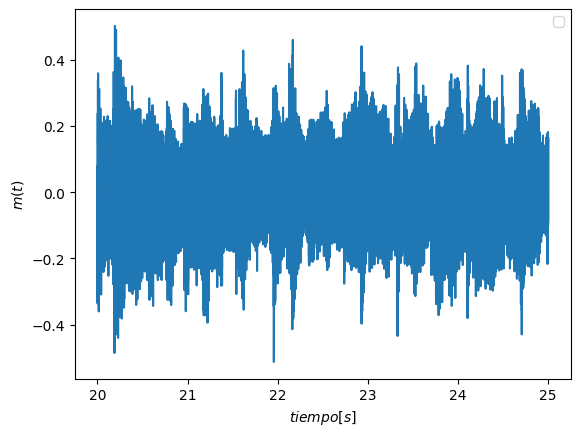

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Señal mensaje en tiempo y frecuencia
tt = np.arange(ti,tf,1/fs) # vector de tiempo
plt.plot(tt,m) #graficar señal mensaje en el tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$m(t)$')
plt.legend()
plt.show()

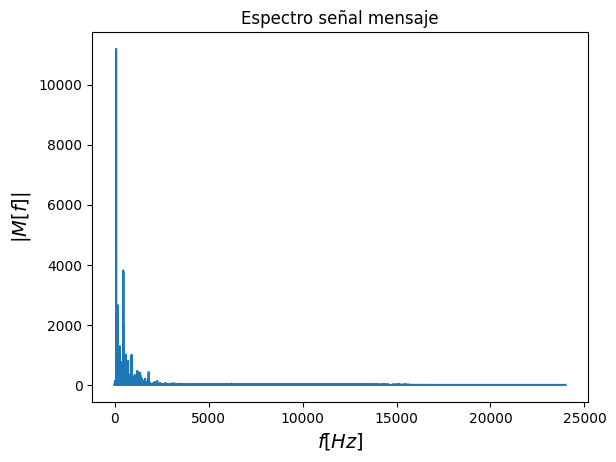

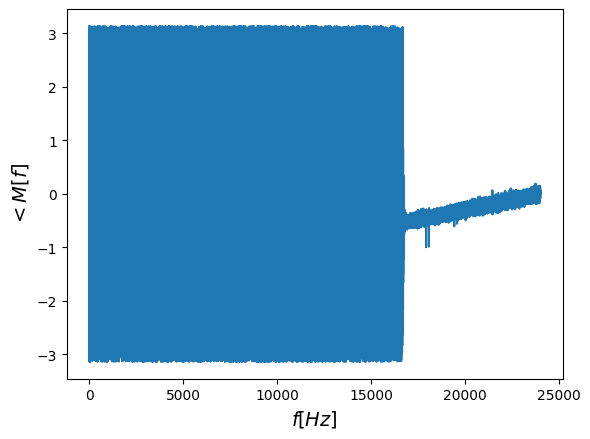

In [ ]:
#Fourier señal mensaje
Mw = np.fft.rfft(m) # axis=0 permite aplicar fft por cada columna de xpro
vf = np.fft.rfftfreq(m.shape[0],1/fs) #se crea el vector de frecuencias
plt.plot(vf,abs(Mw))#se grafica la magnitud
plt.title(r'Espectro señal mensaje')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|M[f]|$',fontsize = 14)
plt.show()

plt.plot(vf, np.angle(Mw))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<M[f]$',fontsize = 14)
plt.show()

In [ ]:
Fc = 15000 #frecuencia portadora
Im = 1 # Im = peak(m(t))/Ac ->  Ac = peak(m(t))/Im
Ac = max(abs(m))/Im #amplitud de la portadora según índice de modulación
c = Ac*np.cos(2*np.pi*Fc*tt) #portadora

#repoducir portadora
Audio(c,rate=fs)

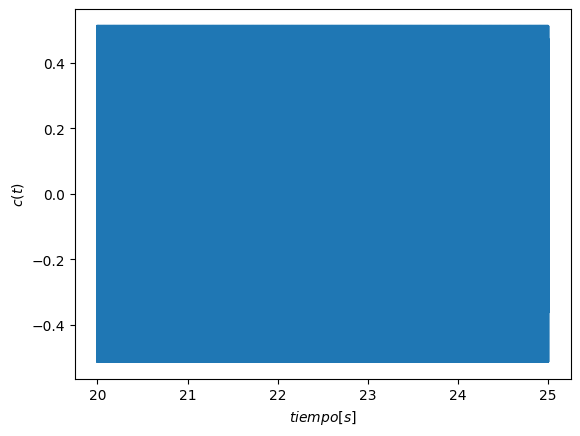

In [ ]:
#Señal portadora en tiempo y frecuencia
plt.plot(tt,c) #graficar señal mensaje en el tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$c(t)$')
plt.show()

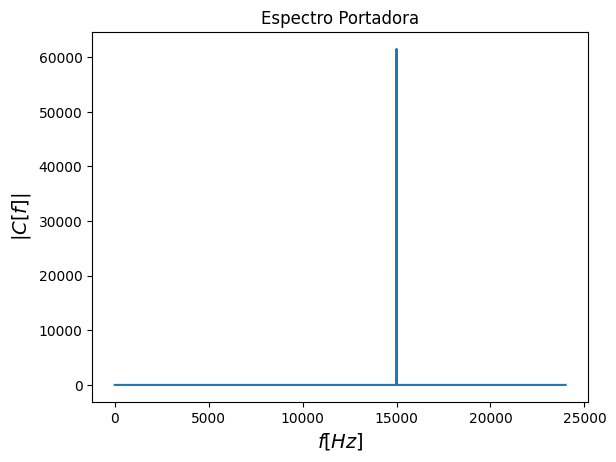

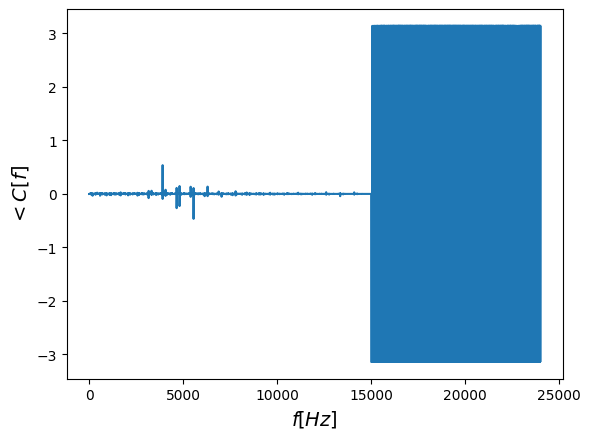

In [ ]:
#Fourier señal portadora
Cw = np.fft.rfft(c) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Cw))#se grafica la magnitud
plt.title(r'Espectro Portadora')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|C[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Cw))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<C[f]$',fontsize = 14)
plt.show()

In [ ]:
#señal modulada
y = (1+m/Ac)*c #señal modulada en AM

#repoducir modulada
Audio(y,rate=fs)

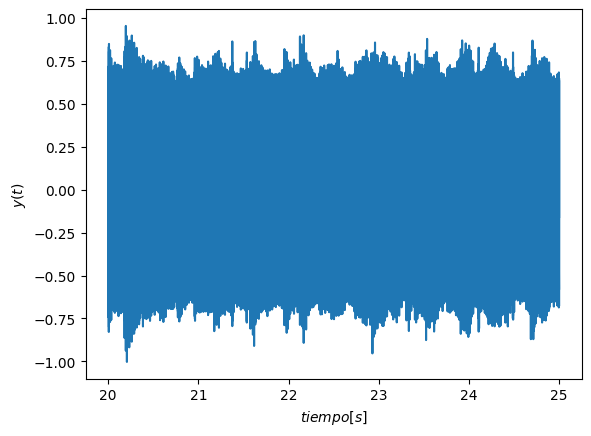

In [ ]:
plt.plot(tt,y) #graficar señal mensaje en el tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$y(t)$')
plt.show()

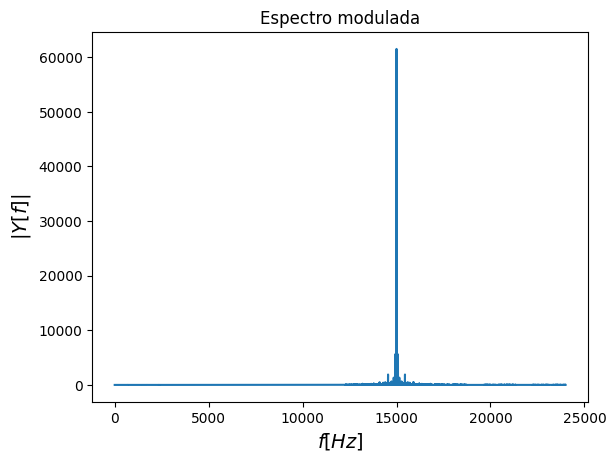

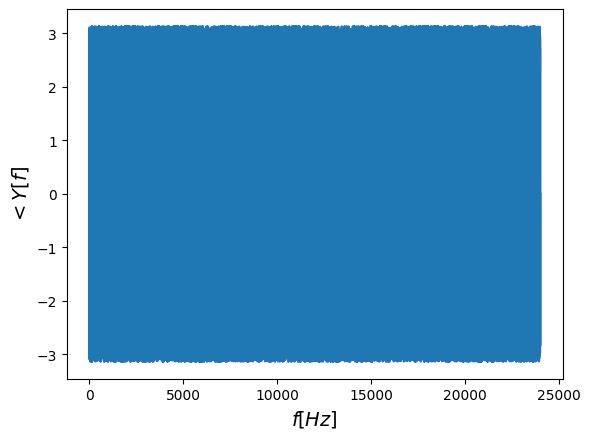

In [ ]:
#Fourier señal modulada
Yw = np.fft.rfft(y) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Yw))#se grafica la magnitud
plt.title(r'Espectro modulada')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|Y[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Yw))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<Y[f]$',fontsize = 14)
plt.show()

**PUNTO 3**

Sea la base de datos para el monitoreo de condicion (fallos)
en rodamientos a partir del analisis de vibraciones descrita
en Case Western Reserve Experiments. Las senales fueron
adquiridas para las siguientes condiciones (clases): i) Normal
bearing (Nor), fault in the internal train (IR1), fault in
the external train (IR2), and fault in the rolling elementball
(BE). Ademas, los fallos se generaron para tres niveles
de severidad (profundidad): 0,007, 0,014, y 0,021 pulgadas,
y tres velocidades de operacion (1730, 1750, 1772,
and 1797 [rpm]). Los datos fueron adquiridos a 12 kHz. Por
consiguiente, se tienen los siguientes parametros de estudio:
Fs = 12k [Hz], cantidad de puntos en el tiempo 4096 y cantidad
de clases C = 10. Grafique la senal promedio de cada
fallo en el tiempo y en la frecuencia. Utilizando la transformada
rapida de Fourier diseñe y construya un detector de
fallos en rodamientos a partir de señales de vibracion y sus
etiquetas en los arreglos Xtrain y Ytrain (ver cuaderno de
apoyo Case Western). Determine las predicciones de fallos
para el arreglo Xtest.

#Solución:

In [ ]:
#data downloaded for google drive
FILEID = "1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O datos.zip && rm -rf /tmp/cookies.txt
!unzip -o datos.zip
!dir

--2023-11-08 14:40:35--  https://docs.google.com/uc?export=download&confirm=t&id=1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn
Resolving docs.google.com (docs.google.com)... 172.253.62.102, 172.253.62.113, 172.253.62.139, ...
Connecting to docs.google.com (docs.google.com)|172.253.62.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-0s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/498krcbpl5oppj9bob055b3c0al77col/1699454400000/09173029842254050324/*/1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn?e=download&uuid=831bb441-2241-45e3-8996-4225cd7e0f1e [following]
--2023-11-08 14:40:36--  https://doc-10-0s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/498krcbpl5oppj9bob055b3c0al77col/1699454400000/09173029842254050324/*/1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn?e=download&uuid=831bb441-2241-45e3-8996-4225cd7e0f1e
Resolving doc-10-0s-docs.googleusercontent.com (doc-10-0s-docs.googleusercontent.com)... 142.251.16.132, 

In [ ]:
#librerias
import scipy.io as sio
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import warnings
from sklearn.metrics import pairwise_distances
import matplotlib
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

#cargar datos
path_ = 'CaractCE.mat'#Case Western Database
dicX = sio.loadmat(path_)

In [ ]:
Xt = dicX['F'] #datos en el tiempo
Fs = 12000 #frecuencia de muestreo
Tl = Xt.shape[1]/Fs #tamaño del segmento
print('Xt shape:',Xt.shape)
print('tiempo [s]', Tl)

Y = dicX['E']
Ytrue = Y[:,2] #clases fallos en los rodamientos

labels_ = ['NOR','IR1_0.007´´','IR1_0.014´´','IR1_0.021´´',
           'IR2_0.007´´','IR2_0.014´´','IR2_0.021´´',
           'BE_0.007´´','BE_0.014´´','BE_0.021´´'
           ] #nombres de las clases

Xt shape: (1200, 4000)
tiempo [s] 0.3333333333333333


In [ ]:
print(Ytrue.shape) #etique membresia de los datos 10 posibles valores
print(np.unique(Ytrue))

(1200,)
[ 1  2  3  4  5  6  7  8  9 10]


In [ ]:
#partir datos para train y test
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xt, Ytrue, test_size=0.3)

print(f"Xtrain shape {Xtrain.shape}, Ytrain shape {Ytrain.shape }Xtest shape {Xtest.shape} ")

Xtrain shape (840, 4000), Ytrain shape (840,)Xtest shape (360, 4000) 


In [ ]:
#calcular espectro de Fourier Xtrain
vf = np.fft.rfftfreq(Xtrain.shape[1],1/Fs) #freq vector
Xw = (abs(np.fft.rfft(Xtrain))) # FFT
Xw.shape

(840, 2001)

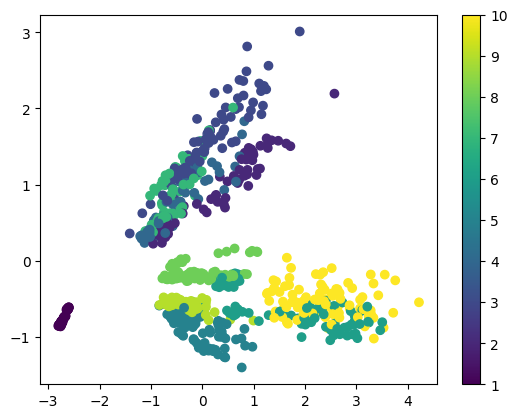

In [ ]:
#graficar espectro para clases representativas
sca_ = MinMaxScaler()
Xw_ = sca_.fit_transform(Xw.T).T
#red = TSNE(perplexity = 15,n_components=2,random_state=123,learning_rate='auto',init='pca')
red = PCA(n_components=2)
Z = red.fit_transform(Xw_)

plt.scatter(Z[:,0],Z[:,1],c=Ytrain, label='Xtrain')
plt.colorbar()
plt.show()

In [ ]:
np.unique(Ytrain)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

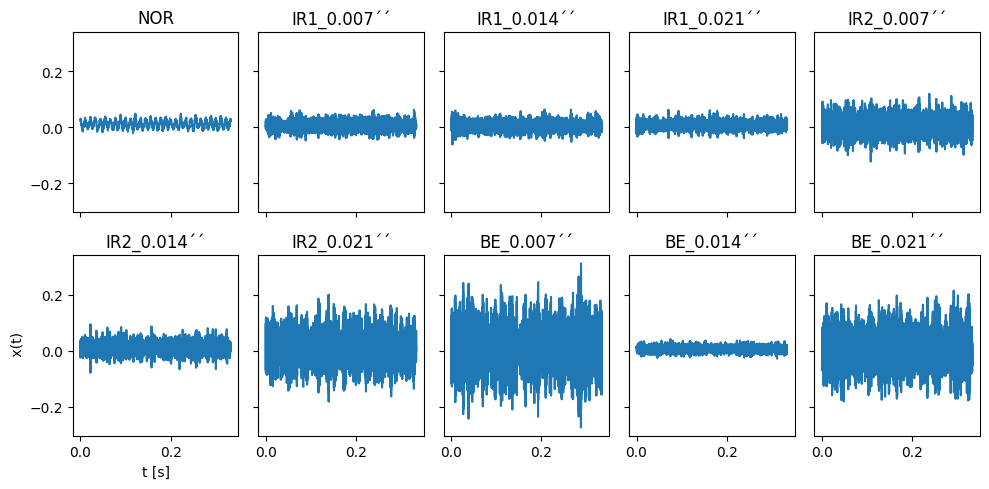

In [ ]:
#graficar señales en tiempo y en frecuencia desde Xtrain y Ytrain

nrows = 2
ncols = 5

#grafica en el tiempo señales promedio por clase
fig, ax = plt.subplots(nrows = nrows, ncols = ncols,
                       sharex = True, sharey=True, figsize=(10,5))
tv = np.arange(0,Tl,1/Fs)
for i in range(nrows):
  for j in range(ncols):
     ax[i,j].plot(tv,Xtrain[Ytrain==ncols*i+j+1].mean(axis=0))
     ax[i,j].set_title(labels_[ncols*i+j])
ax[1,0].set_xlabel('t [s]')
ax[1,0].set_ylabel(' x(t)')
plt.tight_layout()
plt.show()

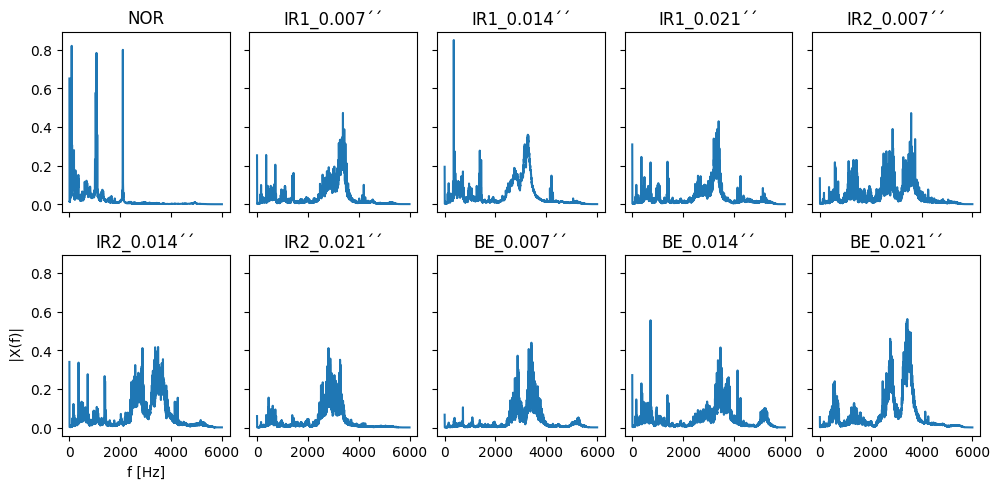

In [ ]:
#grafica frecuencia - señales promedio por clase
fig, ax = plt.subplots(nrows = nrows, ncols = ncols,
                       sharex = True, sharey=True, figsize=(10,5))
tv = np.arange(0,Tl,1/Fs)
for i in range(nrows):
  for j in range(ncols):
     ax[i,j].plot(vf,abs(Xw_[Ytrain==ncols*i+j+1]).mean(axis=0))
     ax[i,j].set_title(labels_[ncols*i+j])
ax[1,0].set_xlabel('f [Hz]')
ax[1,0].set_ylabel(' |X(f)|')
plt.tight_layout()
plt.show()

In [ ]:
from scipy.spatial.distance import cdist
#fft Xtest
Xwt = (abs(np.fft.rfft(Xtest))) # FFT
Xwt_ = sca_.fit_transform(Xwt.T).T

Dtr_te = cdist(Xw_,Xwt_)
Dtr_te.shape #distancias espectros Xtrain vs Xtest

(840, 360)

In [ ]:
ind_ = np.argmin(Dtr_te,axis=0)
ind_.shape

(360,)

In [ ]:
Ytest_e = Ytrain[ind_]

In [ ]:
from sklearn.metrics import accuracy_score

print(f"ACC={accuracy_score(Ytest,Ytest_e)}")


ACC=1.0
